In [2]:
import json
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import plotly.express as px

In [39]:
DATA_FILES = [f for f in Path('data').glob('*.json') if f.stem[-1] != '0']

In [40]:
# Load data
author_affiliations = {}
all_papers = []
for filename in DATA_FILES:
    venue = filename.stem
    year = int(venue[-2:]) + 2000
    with open(filename) as f:
        papers = json.load(f)
    for paper in papers:
        authors = []
        affiliations = []
        for author in paper['authors']:
            # TODO check if any author changed affiliations. Yep, that happens...
            name = author['name']
            affiliation = author['affiliation']
            author_affiliations[name] = affiliation
            authors.append(name)
            affiliations.append(affiliation)
        paper['authors'] = authors
        paper['affiliations'] = affiliations
        paper['venue'] = venue
        paper['year'] = year
        all_papers.append(paper)
papers = pd.DataFrame(all_papers)
papers.head()

title  \
0  Work in progress: A machine learning approach ...   
1  Teaching software inspection effectiveness: An...   
2       Microwave engineering education over the web   
3  Work in progress: Redesigned First-Year Semina...   
4  Animated engineering tutors: Middle school stu...   

                                                link  \
0  https://doi.ieeecomputersociety.org/10.1109/FI...   
1  https://doi.ieeecomputersociety.org/10.1109/FI...   
2  https://doi.ieeecomputersociety.org/10.1109/FI...   
3  https://doi.ieeecomputersociety.org/10.1109/FI...   
4  https://doi.ieeecomputersociety.org/10.1109/FI...   

                                            abstract  \
0  One of the challenges in effective software en...   
1  This paper discusses a novel active learning e...   
2  An online simulated Smith chart is designed as...   
3  This paper discusses the delivery of content a...   
4  The goal of the study was to explore middle sc...   

                                             authors  \
0  [Aishwarya Iyer, Shihong Huang, Rainer Todtenh...   
1                              [Walter W. Schilling]   
2             [Omar Hasan, A. Y. Al-Zoubi, Omar Ata]   
3                            [Ramakrishnan Sundaram]   
4      [Gamze Ozogul, Amy Johnson, Martin Reisslein]   

                                                tags  \
0  [teamwork, machine learning, software, softwar...   
1  [education, software, correlation, measurement...   
2  [microwave transistors, microwave circuits, st...   
3  [engineering profession, course modules, semin...   
4  [preferences, humans, engineering tutor, educa...   

                                        affiliations  venue  year  
0  [Department of Computer Science, San Francisco...  FIE12  2012  
1  [Department of Electrical Engineering and Comp...  FIE12  2012  
2  [Communication Engineering Department, Princes...  FIE12  2012  
3                                [Gannon University]  FIE12  2012  
4  [School of Electrical, Computer and Energy Eng...  FIE12  2012

In [41]:
# Define functions
def find_keywords(keywords):
    def find(row):
        search_str = row.title.lower() + row.abstract.lower() + ''.join(t.lower() for t in row.tags)
        for word in keywords:
            if word in search_str:
                return 1
        return 0
    return find


def papers_with_keywords_percent(papers, keywords):
    found = papers.apply(find_keywords(keywords), axis=1).sum()
    return 100 * found / len(papers)


def sort_by_occurrence(values, decreasing=True):
    c = Counter(values)
    return sorted(((count, v) for v, count in c.items()), reverse=decreasing)

# Counting some keywords

In [47]:
search_keywords = [
    ['automatic', 'automated', 'autograding'],
    ['project'],
    ['peer', 'cooperative', 'pair'],
    ['active learning'],
    ['game', 'gamification'],
    ['women', 'gender', 'diversity'],
    ['accessibility', 'disability'],
    ['online', 'mooc'],
]
years = sorted(papers.year.unique())
for keywords in search_keywords:
    print(f'KEYWORDS: {", ".join(keywords)}')
    for year in years:
        papers_by_year = papers[papers.year == year]
        print(f'{year}: {papers_with_keywords_percent(papers_by_year, keywords):.2f}% of the papers include the keywords')
    print()

KEYWORDS: automatic, automated, autograding
2011: 3.03% of the papers include the keywords
2012: 3.51% of the papers include the keywords
2013: 4.43% of the papers include the keywords
2014: 4.55% of the papers include the keywords
2015: 6.88% of the papers include the keywords
2016: 5.56% of the papers include the keywords
2017: 5.25% of the papers include the keywords
2018: 5.32% of the papers include the keywords
2019: 5.11% of the papers include the keywords

KEYWORDS: project
2011: 27.60% of the papers include the keywords
2012: 24.39% of the papers include the keywords
2013: 22.56% of the papers include the keywords
2014: 28.82% of the papers include the keywords
2015: 25.48% of the papers include the keywords
2016: 22.75% of the papers include the keywords
2017: 23.77% of the papers include the keywords
2018: 25.66% of the papers include the keywords
2019: 21.19% of the papers include the keywords

KEYWORDS: peer, cooperative, pair
2011: 7.37% of the papers include the keywords


# Common Author Tags

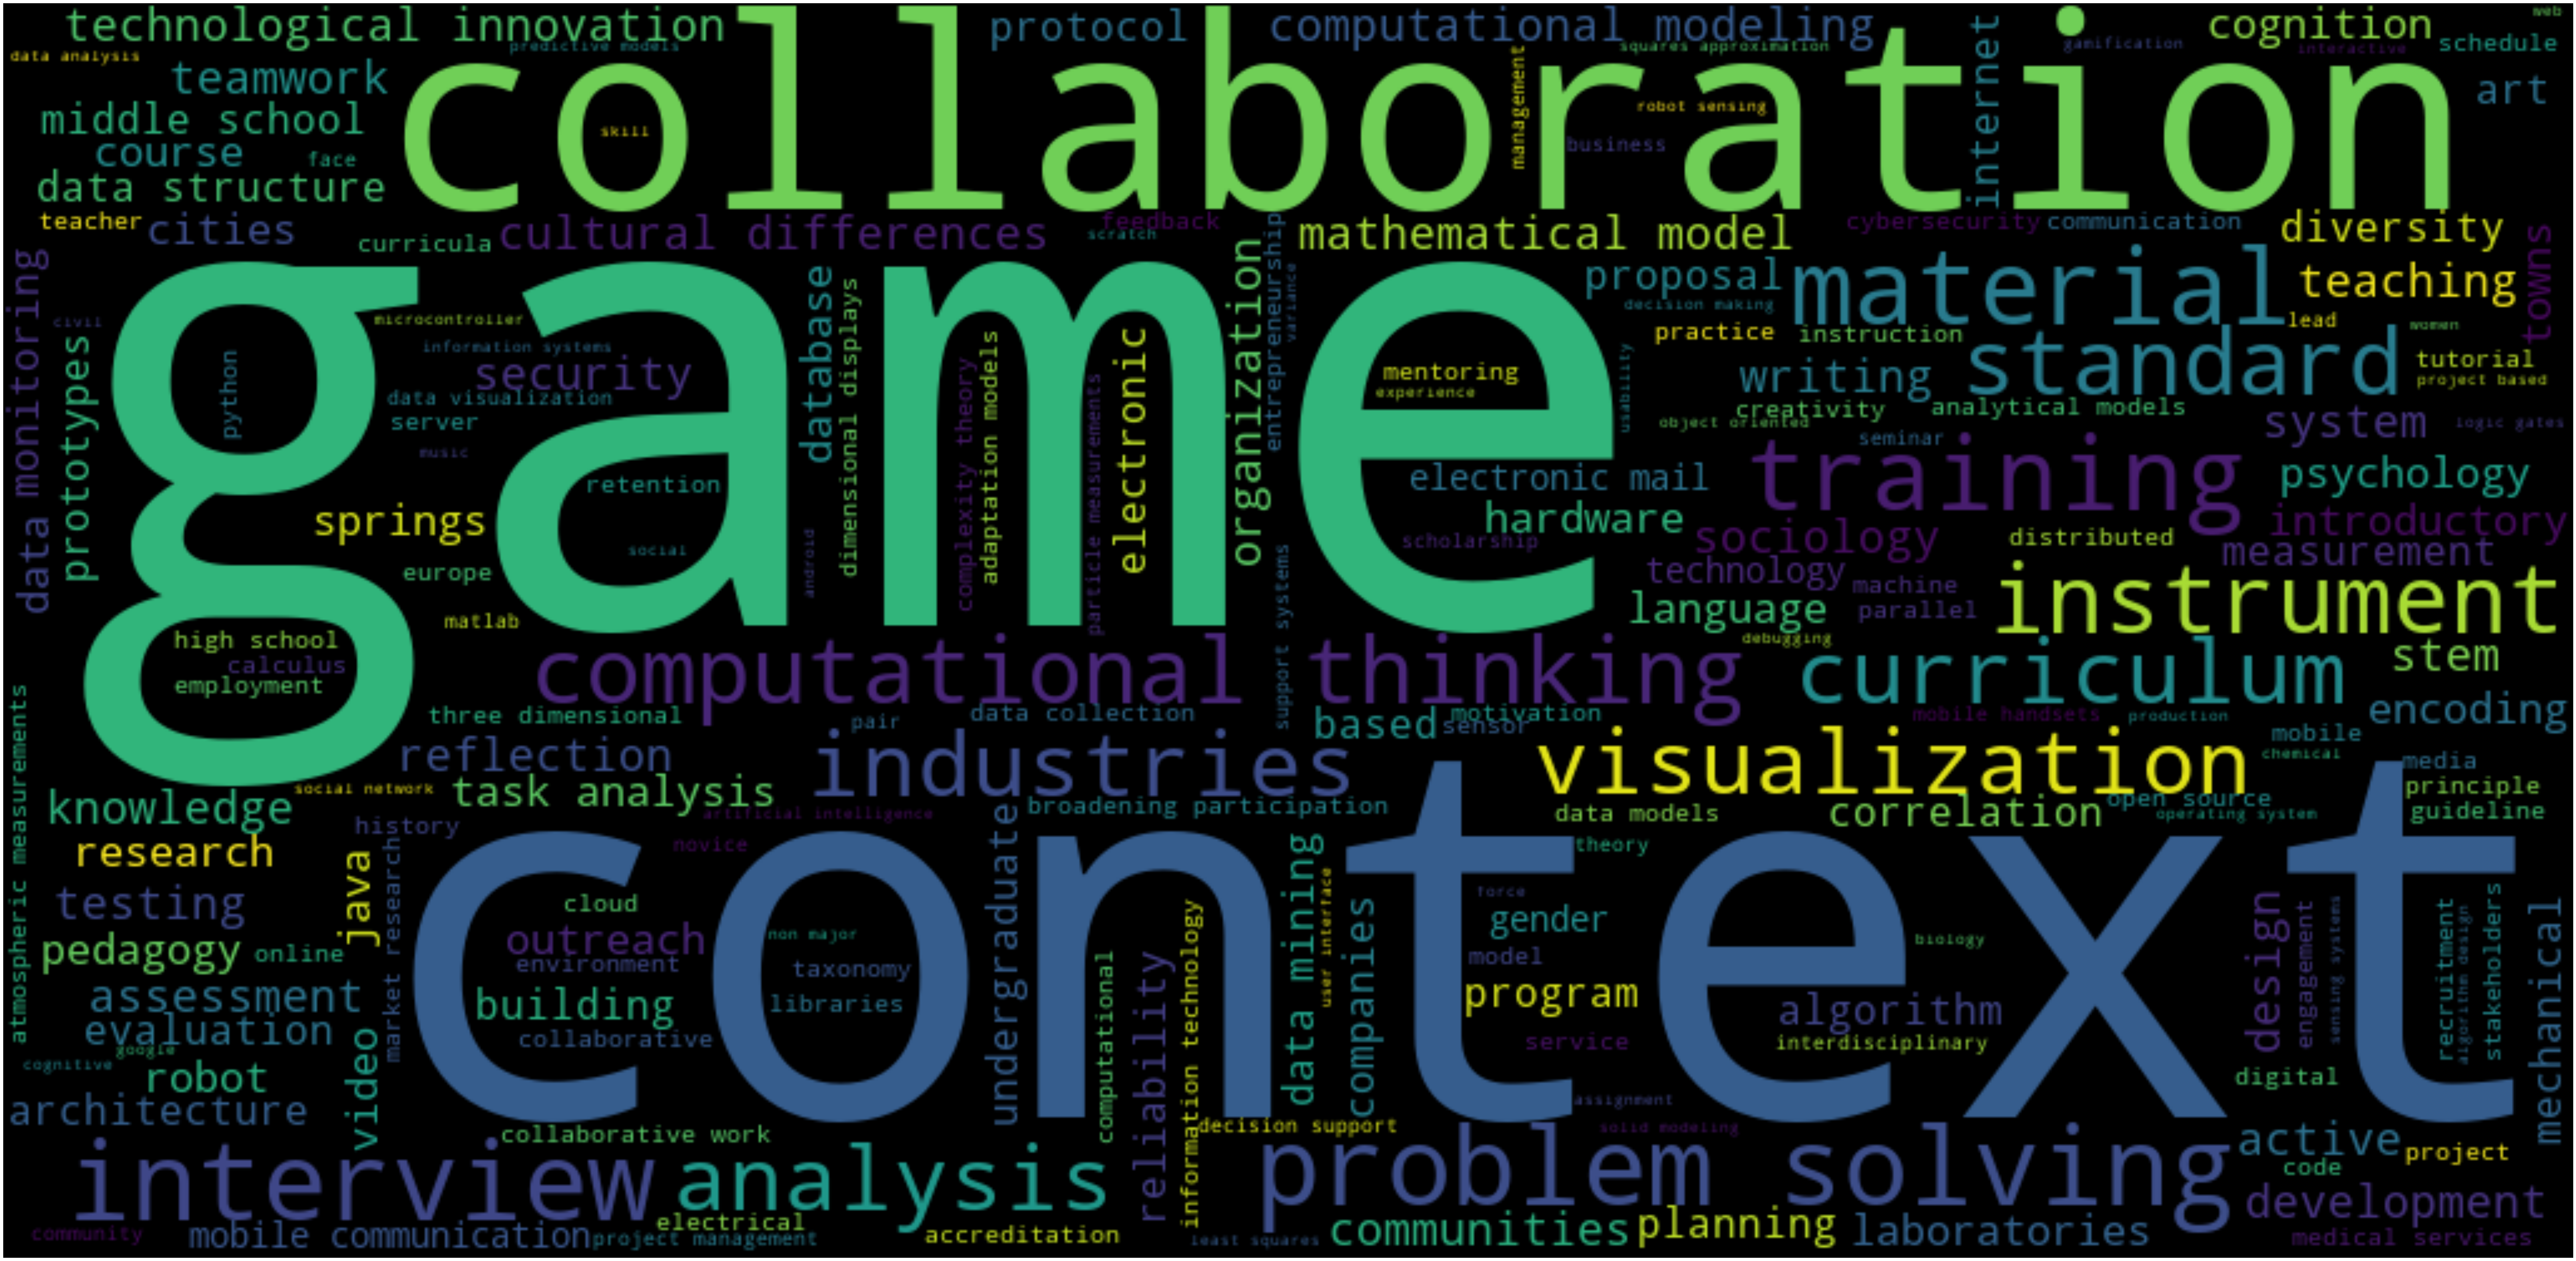

In [56]:
ignore = ['programming', 'education', 'learning', 'computer', 'science', 'computing', 'student', 'cs1', 'tool', 'cs', 'engineering', 'software', 'tools', 'profession', 'educational', 'institutions', 'conference']
all_tags = (w.lower().strip() for t in papers.tags.sum() for w in t.split())
all_tags = [w for w in all_tags if not any(ign in w for ign in ignore)]
all_tags = ' '.join(all_tags)
wordcloud = WordCloud(width=1024, height=500).generate(all_tags)
fig, ax = plt.subplots(figsize=(100, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

In [8]:
all_tags = [t.lower() for t in papers.tags.sum()]
for count, tag in sort_by_occurrence(all_tags):
    if count > 10:
        print(f'{tag} ({count} publications)')

education (1062 publications)
educational institutions (1058 publications)
engineering education (449 publications)
conferences (429 publications)
computer science education (412 publications)
engineering students (410 publications)
software (358 publications)
context (357 publications)
computer science (357 publications)
engineering profession (341 publications)
computers (341 publications)
interviews (331 publications)
programming profession (318 publications)
programming (308 publications)
cs1 (300 publications)
collaboration (297 publications)
tools (289 publications)
materials (253 publications)
games (244 publications)
training (237 publications)
problem-solving (236 publications)
computational thinking (236 publications)
instruments (209 publications)
visualization (201 publications)
software engineering (200 publications)
industries (200 publications)
technological innovation (193 publications)
standards (184 publications)
sociology (177 publications)
computational modeling (17

In [22]:
def filter_tags_by_year(row):
    tags = row.tags
    year = int(row.venue[-2:]) + 2000
    return [{'year': year, 'tag': tag.lower()} for tag in tags]

tags_by_year = pd.DataFrame(papers.apply(filter_tags_by_year, axis=1).sum())
tag_counts = tags_by_year.groupby('tag').count()
popular_tags = list(tag for tag in tag_counts[tag_counts.year > 20].index if tag)
popular_tags_by_year = tags_by_year[tags_by_year.tag.isin(popular_tags)]
tby = popular_tags_by_year.groupby(['tag', 'year']).year.count().unstack().fillna(0)
tby[tby[2015] < tby[2020]]

year                              2010  2011  2012  2013  2014  2015  2016  \
tag                                                                          
accessibility                      0.0   1.0   1.0   1.0   2.0   3.0   2.0   
active learning                    6.0   6.0  15.0  24.0  15.0  11.0  13.0   
assessment                         8.0   5.0  24.0  14.0   7.0  10.0  11.0   
block-based programming            0.0   0.0   0.0   0.0   0.0   1.0   1.0   
broadening participation           3.0   1.0   0.0   4.0   5.0  12.0   8.0   
collaborative learning             2.0   4.0   7.0   4.0   4.0   1.0   4.0   
community college                  0.0   0.0   0.0   0.0   0.0   2.0   3.0   
computational thinking            11.0  12.0  16.0  25.0  17.0  13.0  13.0   
computer science education        17.0  22.0  29.0  29.0  35.0  33.0  46.0   
computing                          1.0   0.0   2.0   1.0   3.0   1.0   1.0   
computing education                0.0   3.0   3.0   5.0   7.0   3.0   3.0   
creativity                         1.0   3.0   4.0   1.0   1.0   1.0  12.0   
cs education                       3.0   5.0   3.0   1.0   5.0   2.0   1.0   
cs for all                         0.0   0.0   0.0   0.0   0.0   0.0   0.0   
cs1                               19.0  16.0  16.0  29.0  30.0  23.0  24.0   
cs2                                4.0   2.0   1.0  10.0   6.0   7.0   8.0   
curriculum                        13.0   3.0  14.0  13.0  11.0  14.0   8.0   
curriculum design                  2.0   4.0   3.0   3.0   1.0   0.0   0.0   
curriculum development             0.0   1.0   4.0   2.0   1.0   1.0   1.0   
cybersecurity                      0.0   1.0   0.0   3.0   3.0   2.0   4.0   
cybersecurity education            0.0   0.0   0.0   0.0   0.0   0.0   2.0   
data science                       0.0   0.0   0.0   0.0   3.0   2.0   5.0   
debugging                          1.0   0.0   0.0   2.0   4.0   4.0   8.0   
diversity                          4.0   4.0   9.0   6.0   6.0   5.0   9.0   
educational data mining            0.0   0.0   0.0   1.0   1.0   0.0   5.0   
engagement                         1.0   1.0   3.0   0.0   0.0   3.0   1.0   
equity                             0.0   0.0   0.0   1.0   1.0   0.0   2.0   
experience report                  1.0   2.0   5.0   2.0   4.0   2.0   2.0   
feedback                           1.0   2.0   4.0   2.0   2.0   0.0   4.0   
gamification                       0.0   0.0   0.0   2.0   6.0   2.0   5.0   
gender                             5.0   2.0   8.0   4.0   5.0   2.0   1.0   
higher education                   0.0   1.0   2.0   0.0   1.0   0.0   1.0   
interdisciplinary                  3.0   0.0   4.0   2.0   4.0   1.0   0.0   
introductory programming           0.0   2.0   6.0   6.0   3.0   6.0   7.0   
k-12                               4.0   3.0   5.0   7.0   7.0   9.0  10.0   
k-12 education                     2.0   3.0   4.0   4.0   6.0   6.0   6.0   
learning                           3.0   2.0   1.0   4.0   2.0   1.0   2.0   
learning analytics                 0.0   0.0   0.0   1.0   0.0   1.0   5.0   
misconceptions                     1.0   0.0   6.0   1.0   3.0   3.0   1.0   
motivation                         4.0   5.0  11.0   0.0   3.0   3.0   2.0   
music                              1.0   1.0   0.0   2.0   1.0   1.0   3.0   
novice programmers                 1.0   3.0   0.0   1.0   2.0   2.0   3.0   
pedagogy                           8.0  14.0  13.0   9.0  13.0   9.0   8.0   
plagiarism                         1.0   3.0   1.0   1.0   1.0   1.0   0.0   
pogil                              0.0   0.0   2.0   2.0   3.0   3.0   4.0   
problem solving                    1.0   0.0   8.0   1.0   3.0   3.0   1.0   
professional development           0.0   1.0   6.0   4.0   6.0   5.0   7.0   
project-based learning             0.0   0.0   5.0   2.0   4.0   2.0   0.0   
retention                          5.0   4.0   9.0   3.0   2.0   6.0   6.0   
robotics              

In [37]:
groups = {
    'gender and diversity': ['women in computing', 'broadening participation in computing', 'gender', 'gender and diversity', 'diversity', 'gender issues', 'women', 'cs for all'],
    'accessibility': ['accessibility', 'disability'],
    'automated grading': ['automated grading', 'grading', 'unit testing', 'autograding', 'automated assessment'],
    'gamification': ['games', 'gamification'],
    'soft skills': ['soft skills', 'communication', 'teamwork'],
    'online learning': ['online learning', 'online education', 'mooc'],
    'peer instruction': ['peer review', 'cooperative learning', 'peer instruction', 'collaborative learning', 'pair programming'],
    'open source': ['open source'],
    'feedback': ['feedback'],
    'interdisciplinary': ['interdisciplinary'],
    'project-based learning': ['project-based learning'],
    'ethics': ['ethics'],
    'active learning': ['active learning'],
}

# filtered_papers = papers[papers.venue.str.startswith('SIGCSE')]
# filtered_papers = papers[papers.venue.str.startswith('FIE')]
# filtered_papers = papers[papers.venue.str.startswith('ITiCSE')]
filtered_papers = papers
total_by_year = filtered_papers.groupby('year').title.count().rename('year_total')
tags_by_year = pd.DataFrame(filtered_papers.apply(filter_tags_by_year, axis=1).sum())
tby = tags_by_year
for group in groups:
    for tag in groups[group]:
        tby.loc[tby.tag == tag,'tag'] = group

tby = tby.groupby(['tag', 'year']).year.count()
tby = tby.rename('total').reset_index()
tby = tby.join(total_by_year, on='year')
tby.loc[:, 'year_freq'] = 100 * tby.total / tby.year_total
selected_tby = tby[tby.tag.isin(groups.keys())]
fig = px.line(selected_tby, x='year', y='year_freq', color='tag', title='')
fig.show()

# Authors

In [11]:
for count, name in sort_by_occurrence(papers.authors.sum()):
    if count > 5:
        print(f'{name} ({count} publications)') 

Leo Porter (45 publications)
Tiffany Barnes (42 publications)
Daniel D. Garcia (40 publications)
Mats Daniels (35 publications)
Daniel Zingaro (33 publications)
Stephen H. Edwards (32 publications)
Mark Guzdial (32 publications)
Kristy Elizabeth Boyer (32 publications)
Adrienne Decker (32 publications)
Matthew W. Ohland (30 publications)
Clifford A. Shaffer (30 publications)
Susan M. Lord (28 publications)
Joel C. Adams (27 publications)
Jeff Gray (27 publications)
Diana Franklin (26 publications)
Andrew Petersen (26 publications)
Allison Godwin (26 publications)
Carla B. Zoltowski (25 publications)
Roger McDermott (24 publications)
Mehran Sahami (24 publications)
Jens Mache (24 publications)
Paul Denny (23 publications)
Michelle Craig (23 publications)
Manuel Castro (23 publications)
Helen H. Hu (23 publications)
Ellen Francine Barbosa (23 publications)
Elizabeth Shoop (23 publications)
Colleen M. Lewis (23 publications)
Monica M. McGill (22 publications)
Geoffrey L. Herman (22 public